In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
import re

In [2]:
adopted = pd.read_csv('adopted.csv')
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

adopted = adopted.drop('Unnamed: 0', 1)

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
adopted.head()

,user_id,adopted,logins
0,1,0,1.0
1,2,1,14.0
2,3,0,1.0
3,4,0,1.0
4,5,0,1.0


In [5]:
# Joining the datasets on the user ids
users_adopted = users.merge(right=adopted, how='left', left_on='object_id', right_on='user_id')

In [6]:
users_adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0,1.0


In [7]:
# removing the user id column from the joined dataset
users_adopted.drop('user_id', axis=1, inplace=True)

In [8]:
users_adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0


In [9]:
len(users_adopted['object_id'].unique())

12000

In [10]:
# the login dataset contained only 8883 users and the remaining did not have a login
# these users are not adopted so they are filled with 0s
users_adopted['adopted'] = users_adopted['adopted'].fillna(0)

In [11]:
users_adopted['adopted'].sum()

1445.0

In [12]:
sum(users_adopted['last_session_creation_time'].isnull())

3177

In [13]:
# Filling the empty values of the last session creation time with 0s
users_adopted['last_session_creation_time'] = users_adopted['last_session_creation_time'].fillna(0)

In [14]:
# Converts the last session time to a datetime object
def time(row):
    if row['last_session_creation_time'] != 0:
        return datetime.utcfromtimestamp(int(row['last_session_creation_time'])).strftime('%Y-%m-%d %H:%M:%S')

users_adopted['last_session_creation_time'] = users_adopted.apply(time, 1)

In [15]:
users_adopted.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0,1.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0,1.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,None,1,1,74,NaN,0.0,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,None,0,0,302,NaN,0.0,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1.0,284.0


In [16]:
# finding the most recent last session creation data (2014-06-06)
users_adopted[users_adopted['last_session_creation_time'].notnull()].max()

object_id                                   12000
creation_time                 2014-05-30 23:59:19
name                             Østergaard Tilde
email                          zzxqnoiy@vhugu.com
creation_source                SIGNUP_GOOGLE_AUTH
last_session_creation_time    2014-06-06 14:58:50
opted_in_to_mailing_list                        1
enabled_for_marketing_drip                      1
org_id                                        416
invited_by_user_id                          11999
adopted                                         1
logins                                        606
dtype: object

In [17]:
# creates a new feature days since last login by subtracting the date from last session from 
# the most recent day + 1

def dates(row):
    if row['last_session_creation_time'] != None:
        return (datetime(2014,6,7) - row['last_session_creation_time']).days
    
users_adopted['last_session_creation_time'] = pd.to_datetime(users_adopted['last_session_creation_time'])    
users_adopted['days_since_last_login'] = users_adopted.apply(dates, 1)

In [18]:
users_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null float64
logins                        8823 non-null float64
days_since_last_login         8823 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 1.3+ MB


In [19]:
users_adopted.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,logins,days_since_last_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0,45.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,14.0,67.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0,444.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1.0,380.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1.0,500.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0,1.0,169.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0,1.0,533.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1.0,284.0,3.0


In [20]:
# extracts the domain of the email address from each user

def domain(row):
    domain = re.search("@[\w.]+", row['email'])
    return domain.group()

users_adopted['email_domain'] = users_adopted.apply(domain, 1)

In [21]:
users_adopted.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,logins,days_since_last_login,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0,45.0,@yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,14.0,67.0,@gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0,444.0,@gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1.0,380.0,@yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1.0,500.0,@yahoo.com
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0,1.0,169.0,@yahoo.com
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0,1.0,533.0,@jourrapide.com
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0,NaN,NaN,@yahoo.com
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0,NaN,NaN,@hotmail.com
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1.0,284.0,3.0,@gustr.com


In [22]:
# creates a new feature invited by user
# if the column is filled out, then the column has a 1. 0 if they were not invited by another user

users_adopted['invited_by_user_id'] = users_adopted['invited_by_user_id'].fillna(0)
def user(row):
    if row['invited_by_user_id'] != 0:
        return 1
    else:
        return 0

users_adopted['invited_by_user'] = users_adopted.apply(user, 1)

In [23]:
# creates a new feature org
# if the column is filled out, then the column has a 1. 0 if they do not have an org

def org(row):
    if row['org_id'] != 0:
        return 1
    else:
        return 0
    
users_adopted['belong_to_org'] = users_adopted.apply(org, 1)

In [24]:
users_adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,logins,days_since_last_login,email_domain,invited_by_user,belong_to_org
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0,45.0,@yahoo.com,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,14.0,67.0,@gustr.com,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0,444.0,@gustr.com,1,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1.0,380.0,@yahoo.com,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1.0,500.0,@yahoo.com,1,1


In [29]:
creation_source = users_adopted.pivot_table(index='adopted', columns='creation_source', values='object_id', aggfunc=len)
opted_in = users_adopted.pivot_table(index='adopted', columns='opted_in_to_mailing_list', values='object_id', aggfunc=len)
market = users_adopted.pivot_table(index='adopted', columns='enabled_for_marketing_drip', values='object_id', aggfunc=len)
org = users_adopted.pivot_table(index='adopted', columns='belong_to_org', values='object_id', aggfunc=len)
org_id = users_adopted.pivot_table(index='adopted', columns='org_id', values='object_id', aggfunc=len)
user_invite = users_adopted.pivot_table(index='adopted', columns='invited_by_user', values='object_id', aggfunc=len)
last_login = users_adopted.groupby('adopted')['days_since_last_login'].mean()
login = users_adopted.groupby('adopted')['logins'].mean()
domain = users_adopted.pivot_table(index='adopted', columns='email_domain', values='object_id', aggfunc=len)

In [30]:
last_login

adopted
0.0    303.957306
1.0     57.676817
Name: days_since_last_login, dtype: float64

In [31]:
login

adopted
0.0      1.558417
1.0    135.930104
Name: logins, dtype: float64

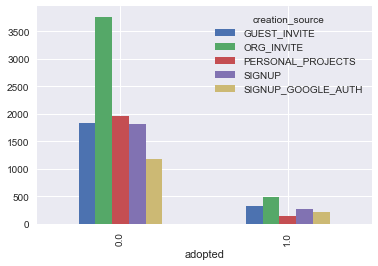

In [32]:
creation_source.plot.bar()

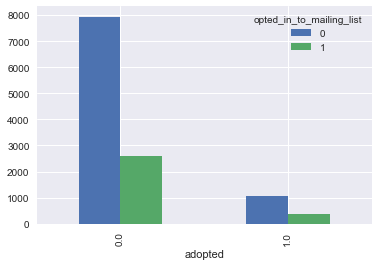

In [33]:
opted_in.plot.bar()

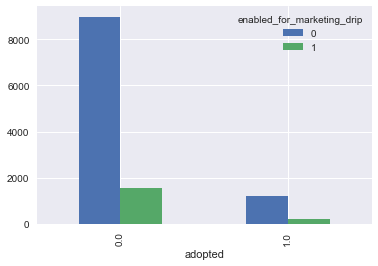

In [34]:
market.plot.bar()

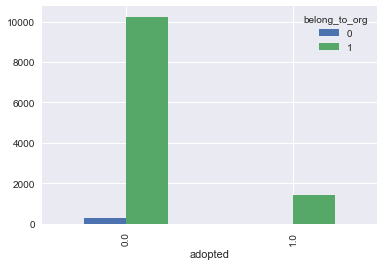

In [35]:
org.plot.bar()

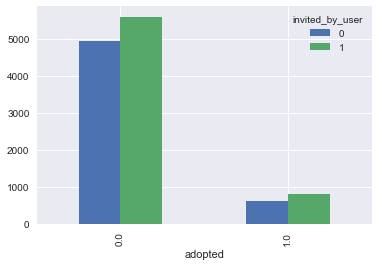

In [36]:
user_invite.plot.bar()

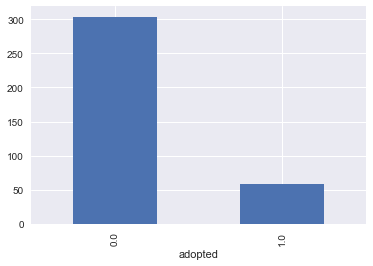

In [37]:
last_login.plot.bar()

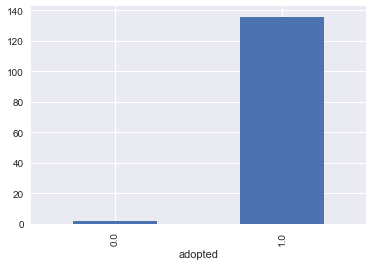

In [38]:
login.plot.bar()

In [39]:
creation_opted_adop = users_adopted[users_adopted['adopted'] == 1].pivot_table(index=['opted_in_to_mailing_list'], columns='creation_source', values='object_id', aggfunc=len)
creation_opted_adop

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,,,,,
0,237,359,113,199,159
1,89,132,34,76,47


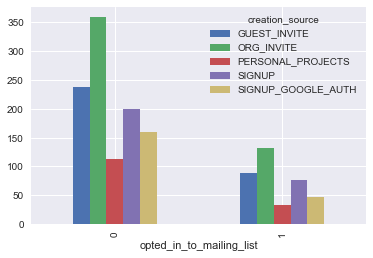

In [40]:
creation_opted_adop.plot.bar()

In [41]:
creation_opted_non_adop = users_adopted[users_adopted['adopted'] == 0].pivot_table(index=['opted_in_to_mailing_list'], columns='creation_source', values='object_id', aggfunc=len)
creation_opted_non_adop

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,,,,,
0,1385,2817,1486,1363,888
1,452,946,478,449,291


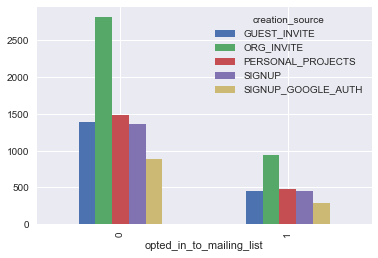

In [42]:
creation_opted_non_adop.plot.bar()

In [43]:
users_adopted.to_csv('users_adopted.csv')

Creating a model to using a Random Forest to get the important features.

In [45]:
users_adopted['creation_source'] = users_adopted['creation_source'].astype('category')
users_adopted['org_id'] = users_adopted['org_id'].astype('category')
users_adopted['email_domain'] = users_adopted['email_domain'].astype('category')

users_adopted = pd.get_dummies(users_adopted, columns=['creation_source','org_id','email_domain'], drop_first=True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [71]:
X = users_adopted.drop(['object_id','creation_time','name','email','last_session_creation_time','invited_by_user_id','adopted','belong_to_org'], 1)
y = users_adopted['adopted']

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=35)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 1608), (2400, 1608), (9600,), (2400,))

In [72]:
n_estimators = 500
class_weight = [{0:.55, 1:.45}, {0:.57, 1:.43}, {0:.58, 1:.42}, {0:.53, 1:.47}, {0:.6, 1:.4}]
max_depth = [5,10,15,20,25]
max_features = ['auto','sqrt','log2']
criterion = ['gini','entropy']
param_grid = {'class_weight':class_weight, 'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features}

rf = RandomForestClassifier(n_estimators, n_jobs=-1)
rf_gs = RandomizedSearchCV(rf, param_grid, n_iter=15, cv=3, scoring='roc_auc')
rf_gs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'class_weight': [{0: 0.55, 1: 0.45}, {0: 0.57, 1: 0.43}, {0: 0.58, 1: 0.42}, {0: 0.53, 1: 0.47}, {0: 0.6, 1: 0.4}], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [73]:
pred = rf_gs.predict(X_test)
score = rf_gs.score(X_test, y_test)
train_score = rf_gs.score(X_train, y_train)

train_score, score

(0.99948477896268628, 0.99236998334201709)

In [74]:
confusion_matrix(y_test, pred)

array([[2145,    1],
       [  60,  194]])

In [75]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99      2146
        1.0       0.99      0.76      0.86       254

avg / total       0.98      0.97      0.97      2400



In [76]:
roc_auc_score(y_test, pred)

0.8816567721672256

In [77]:
rf_gs.best_params_

{'class_weight': {0: 0.6, 1: 0.4},
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto'}

In [86]:
rf1 = RandomForestClassifier(n_estimators, class_weight={0: 0.6, 1: 0.4}, criterion='entropy', max_depth=25, max_features='auto', n_jobs=-1, oob_score=True)
rf1.fit(X_train,y_train)
pred_rf = rf1.predict(X_test)
score_rf = rf1.score(X_test, y_test)
train_score_rf = rf1.score(X_train, y_train)

train_score_rf, score_rf

(0.97833333333333339, 0.97416666666666663)

In [87]:
confusion_matrix(y_test, pred_rf)

array([[2145,    1],
       [  61,  193]])

In [88]:
print(classification_report(y_test, pred_rf))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99      2146
        1.0       0.99      0.76      0.86       254

avg / total       0.97      0.97      0.97      2400



In [89]:
roc_auc_score(y_test, pred_rf)

0.87968826823021773

In [90]:
importance = list(rf1.feature_importances_)

In [91]:
features = list(X_train.columns)

In [92]:
feat_dict = {'features':features,'importance':importance}
feat_df = pd.DataFrame(feat_dict)

In [93]:
feat_df.sort_values('importance', ascending=False).head(15)

,features,importance
2,logins,0.566933
3,days_since_last_login,0.190772
6,creation_source_PERSONAL_PROJECTS,0.012206
1536,email_domain_@yahoo.com,0.006896
717,email_domain_@gmail.com,0.006482
5,creation_source_ORG_INVITE,0.006364
8,creation_source_SIGNUP_GOOGLE_AUTH,0.006199
7,creation_source_SIGNUP,0.005987
0,opted_in_to_mailing_list,0.005943
4,invited_by_user,0.005900
